In [1]:
'''
11/19/23
    Creating a script for going through all the lenses and fitting the global galaxy spectrum with different stellar libraries
    Using ppxf_kinematics_getGlobal_lens_deredshift_library_test from home/shawnknabel/Documents/slacs_kinematics/my_python_packages/ppxf_kcwi_util_022423/kcwi_util.py
    Copied from home/shawnknabel/Documents/slacs_kinematics/code/codeforanalyzingkcwislacslenses_/ppxf_kinematics_SLACS_lenses/SDSSJ0029-0055/SDSSJ0029-0055_ppxf_kinematics_022423.py
------
Code for extracting the kinematics information from the
KCWI data with ppxf.
Geoff Chih-Fan Chen, Feb 28 2022 for Shawan Knabel.
Shawn Knabel, Feb 28 2022 editting for my own machine and directories.
03/01/22 - SDSSJ0029-0055
07/12/22 - load and check both R=1 and R=2 center apertures. Favor R=1 and just do R=2 in the systematics check.
#############################################################
This is the Fateful Disaster Part 2 response.
I need to change the following:
1. Make "obj_dir" -> "mos_dir" for mosaic directory. Load from here, but do not save here.
2. Make "kin_dir", where we will save the values from these, and specify the "target_sn_10" (etc) directory for each experiment
3. Fix "Exp_time" -> should not have *60
4. Set the "Vorbin_target_SN" to be the one in the experiment
'''

# import libraries
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ppxf
import ppxf.ppxf_util as ppxf_util
import os
# import my packages
import sys
sys.path.append("/home/shawnknabel/Documents/slacs_kinematics/my_python_packages")
from ppxf_kcwi_util_022423.kcwi_util import ppxf_kinematics_getGlobal_lens_deredshift_library_test
from ppxf_kcwi_util_022423.kcwi_util import register_sauron_colormap
from ppxf_kcwi_util_022423.kcwi_util import visualization
from ppxf_kcwi_util_022423.kcwi_util import get_datacube
#from ppxf_kcwi_util_022423.kcwi_util import ppxf_kinematics_RXJ1131_getGlobal_lens_deredshift
from ppxf_kcwi_util_022423.kcwi_util import find_nearest
from ppxf_kcwi_util_022423.kcwi_util import SN_CaHK
from ppxf_kcwi_util_022423.kcwi_util import select_region
from ppxf_kcwi_util_022423.kcwi_util import voronoi_binning
from ppxf_kcwi_util_022423.kcwi_util import get_voronoi_binning_data
from ppxf_kcwi_util_022423.kcwi_util import get_velocity_dispersion_deredshift
from ppxf_kcwi_util_022423.kcwi_util import kinematics_map
from ppxf_kcwi_util_022423.kcwi_util import stellar_type

import pathlib # to create directory
import pickle

register_sauron_colormap()

#------------------------------------------------------------------------------
# Directories and files

# data directory
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
#hst_dir = '/data/raw_data/HST_SLACS_ACS/kcwi_kinematics_lenses/'
tables_dir = f'{data_dir}tables/'
mosaics_dir = f'{data_dir}mosaics/'
kinematics_full_dir = f'{data_dir}kinematics/'
kinematics_dir = f'{data_dir}stellar_library_tests/'
if not os.path.exists(kinematics_dir):
    os.mkdir(kinematics_dir)

#################################################
# objects
obj_names = ['SDSSJ0029-0055', 
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

#################################################
# tables
paper_table = pd.read_csv(f'{tables_dir}paper_table_100223.csv')
slacs_ix_table = pd.read_csv(f'{tables_dir}slacs_ix_table3.csv')
zs = paper_table['zlens']

#################################################
# libraries
templates_names = ['xshooter',
                   'fsps',
                  'galaxev',
                  'emiles'
                  ]
#################################################


In [2]:
plot=False

In [3]:
stellar_library_tests = np.zeros((len(obj_names),4))

In [19]:
for i, obj_name in enumerate(obj_names):

    print()
    print('#################################################')
    print('#################################################')
    print()
    print(obj_name)
    
    print()
    print('My VD w/in reff')
    print(paper_table.loc[i, 'VD_reff'])
    
    # other necessary directories ... Be very careful! This is how we will make sure we are using the correct files moving forward.
    mos_dir = f'{mosaics_dir}{obj_name}/' # files should be loaded from here but not saved
    kin_dir = f'{kinematics_dir}{obj_name}/'
    if not os.path.exists(kin_dir):
        os.mkdir(kin_dir)
    
    ################################################################################
    # 11/19/23 - Template tests, loop through the template sets
    
    for j, templates_name in enumerate(templates_names):
        
        #print()
        #print('#################################################')
        #print()
        #print(templates_name)
        
        try:
            with open(f'{kin_dir}{obj_name}_{templates_name}_global_template_spectrum_fit.pkl', 'rb') as f:
                pp = pickle.load(f)
                print(pp.sol[1])
                VD = pp.sol[1]
                if plot==True:
                    pp.plot()
                    plt.xlim(wave_min/1000, wave_max/1000) # it's in microns
                    plt.title(f'V {np.around(pp.sol[0], 2)} km/s, VD {np.around(pp.sol[1],2)} km/s')
        
        except:
            VD = 0
            print('No fit.')
        
        stellar_library_tests[i,j] = VD
            
        


#################################################
#################################################

SDSSJ0029-0055

My VD w/in reff
196
186.8790897009045
223.56120855711285
227.57790657305475
213.50167561819566

#################################################
#################################################

SDSSJ0037-0942

My VD w/in reff
258
281.38703647826924
294.946362304046
291.80049131696774
292.62997340713724

#################################################
#################################################

SDSSJ0330-0020

My VD w/in reff
220
No fit.
230.96331466013564
269.7048008667975
246.77546022791566

#################################################
#################################################

SDSSJ1112+0826

My VD w/in reff
255
287.4966567158533
296.10497792689995
297.68532392976675
298.2516725421967

#################################################
#################################################

SDSSJ1204+0358

My VD w/in reff
244
263.10338278908796
276.

/tmp/ipykernel_1608317/3910154031.py:2: RuntimeWarning: divide by zero encountered in divide
  four = stellar_library_tests[i]/stellar_library_tests[i,0]
/tmp/ipykernel_1608317/3910154031.py:2: RuntimeWarning: invalid value encountered in divide
  four = stellar_library_tests[i]/stellar_library_tests[i,0]


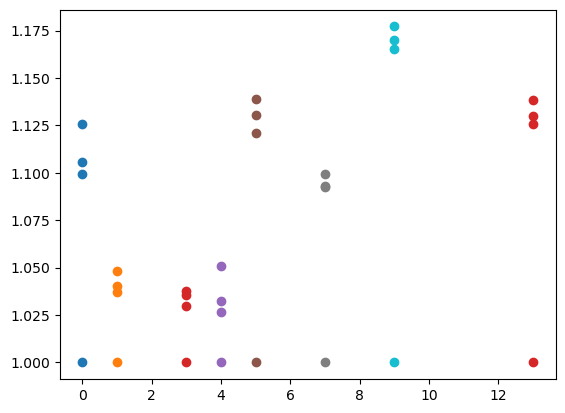

In [5]:
for i in range(len(obj_names)):
    four = stellar_library_tests[i]/stellar_library_tests[i,0]
    plt.scatter(np.ones(4)*i, four)

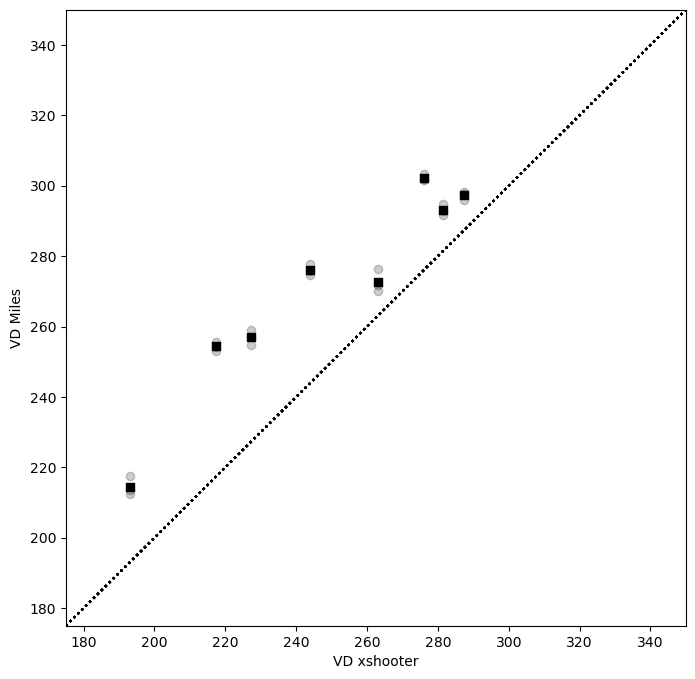

In [6]:
plt.figure(figsize=(8,8))
for i in range(len(obj_names)):
    plt.scatter(stellar_library_tests[i,0]*np.ones(3), stellar_library_tests[i,1:], c='k', alpha=0.2)
    plt.scatter(stellar_library_tests[i,0], np.mean(stellar_library_tests[i,1:]), marker='s', c='k')
    plt.xlim(175, 350)
    plt.ylim(175, 350)
    plt.plot(np.linspace(175, 350, 100), np.linspace(175, 350, 100), linestyle=':', color='k')
    plt.xlabel('VD xshooter')
    plt.ylabel('VD Miles')

In [7]:
stellar_library_tests[stellar_library_tests==0] = 'Nan'

In [8]:
means_factors = np.nanmean(stellar_library_tests[:,1:], axis=1)/stellar_library_tests[:,0]

/tmp/ipykernel_1608317/2635402414.py:1: RuntimeWarning: Mean of empty slice
  means_factors = np.nanmean(stellar_library_tests[:,1:], axis=1)/stellar_library_tests[:,0]


In [9]:
means_factors = means_factors[np.isfinite(means_factors)]

In [10]:
means_factors

array([1.11016925, 1.04170632, 1.03426366, 1.03665048, 1.13017579,
       1.09491798, 1.17083972, 1.13136617])

In [11]:
np.mean(means_factors)

1.0937611710546942